In [2]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("DATA/weekly_co2_oct_jan_25.csv", delimiter=",")
df

,Uger,Fuel (l),Idling,Working,CO2 (diesel),Motortimer,L/time,Tomgangsprocent,Activity,Week_Num
0,Uge 46 '24,111.9,2.700000,5.8,297.7,8.5,13.1,31.5,Soil Removal,1
1,Uge 47 '24,701.4,12.500000,42.4,1865.7,54.9,12.8,22.7,Soil Removal,2
2,Uge 48 '24,674.9,13.800000,38.2,1795.2,51.5,13.1,26.7,Soil Removal,3
3,Uge 49 '24,876.8,13.600000,50.9,2332.3,64.5,13.6,21.1,Soil Removal,4
4,Uge 50 '24,806.2,16.900000,48.2,2144.5,65.0,12.4,26.1,Sewer Work,5
5,Uge 51 '24,682.5,12.600000,42.1,1815.5,54.7,12.5,23.1,Sewer Work,6
6,Uge 1 '25,3.5,0.400000,0.3,9.3,0.7,4.9,60.3,Bottom Construction road,7
7,Uge 2 '25,392.1,13.700000,24.0,1043.0,37.8,10.4,36.4,Bottom Construction road,8
8,Uge 3 '25,823.6,9.416667,39.2,2190.8,48.4,17.0,19.0,Asphalt,9
9,Uge 4 '25,765.4,6.700000,39.5,2036.0,46.2,16.6,14.6,Asphalt,10


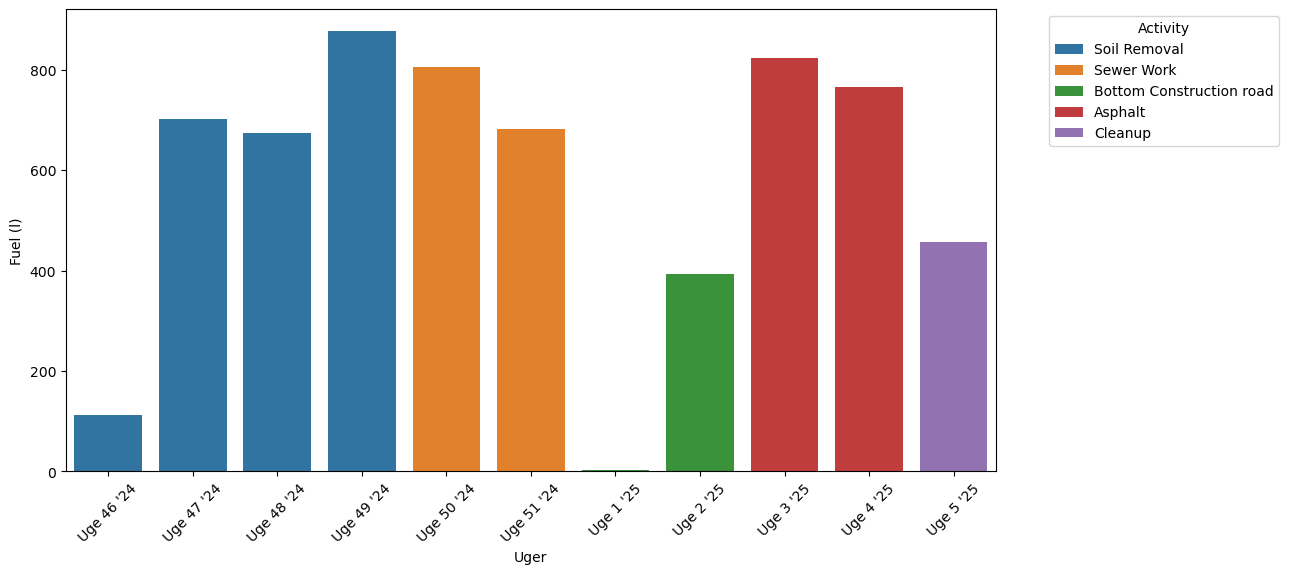

In [4]:
# Convert to DataFrame
df = pd.read_csv("DATA/weekly_co2_oct_jan_25.csv", delimiter=",")
#df = df.dropna()

# Create a color palette for activities
#activity_colors = sns.color_palette("tab10", len(df['Activity'].unique()))
#activity_color_map = dict(zip(df['Activity'].unique(), activity_colors))

# Visualization 1: Stacked Bar Chart for Weekly Fuel Usage by Activity
plt.figure(figsize=(12, 6))
sns.barplot(x='Uger', y='Fuel (l)', hue='Activity', data=df)
#, palette=activity_color_map)
plt.xticks(rotation=45)
#plt.xlabel('')
#plt.ylabel('Fuel (l)')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.tight_layout()
#plt.savefig("Charts/fuel_oct_jan.png")
plt.show()


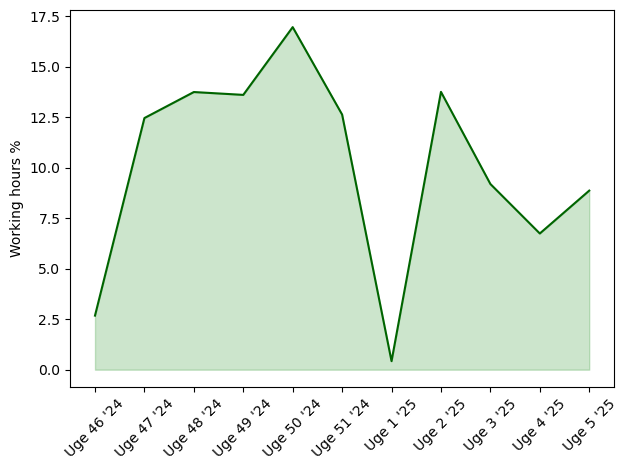

In [5]:
#Area Chart
x=df["Uger"]
y = df["Tomgangsprocent"] * df["Motortimer"]/100
plt.fill_between(x, y, color="green", alpha=0.2)
plt.plot(x, y, color="darkgreen")
plt.xticks(rotation=45)
plt.ylabel("Working hours %")
plt.tight_layout()
#plt.savefig("Charts/working_ratio_oct_jan.png")

# See the line plot function to learn how to customize the plt.plot function

# Show the graph
plt.show()

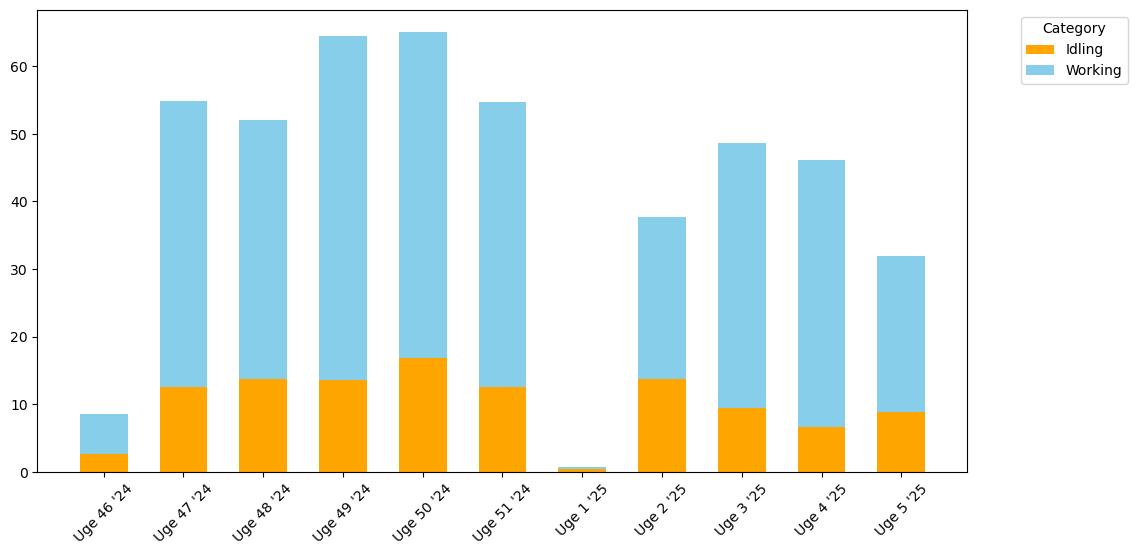

In [6]:
#Stacked Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.6
ax.bar(df["Uger"], df["Idling"], label='Idling', color='orange', width=bar_width)
ax.bar(df["Uger"], df["Working"], bottom=df["Idling"], label='Working', color='skyblue', width=bar_width)

# Customize chart
#ax.set_xlabel('')
#ax.set_ylabel('Hours')
ax.legend(title='Category', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
#plt.tight_layout()
#plt.savefig("Charts/engine_h_oct_jan.png")

# Show plot
plt.show()

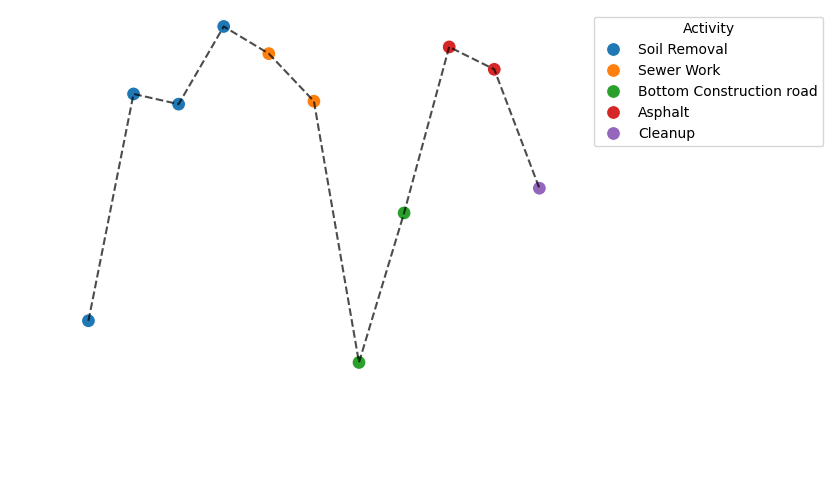

<Figure size 640x480 with 0 Axes>

In [27]:
#Bonus Chart:
sns.lineplot(x='Uger', y='Fuel (l)', data=df, color="black",linestyle="dashed", alpha=0.7)
sns.scatterplot(x='Uger', y='Fuel (l)', hue='Activity', data=df, s=100)
plt.xticks(rotation=45)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.savefig("Charts/fuel_oct_jan.png", transparent= True)

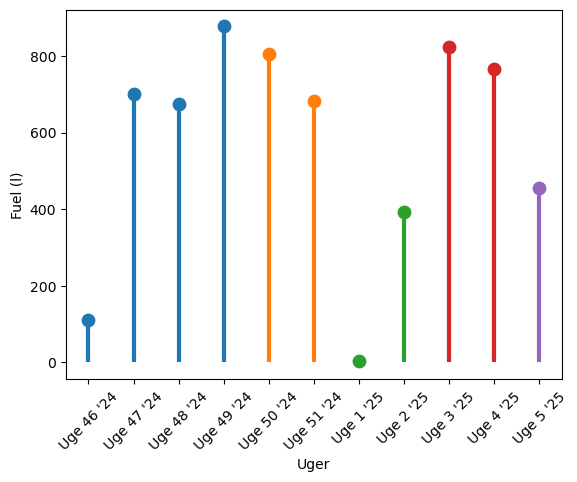

In [19]:
#Lollipop Chart
import matplotlib.pyplot as plt
activity_colors = sns.color_palette("tab10", len(df['Activity'].unique()))
activity_color_map = dict(zip(df['Activity'].unique(), activity_colors))
fig, ax = plt.subplots()
for activity, color in activity_color_map.items():
    subset = df[df['Activity'] == activity]
    ax.vlines(x=subset['Uger'], ymin=0, ymax=subset['Fuel (l)'], color=color, linewidth=3)
    ax.scatter(subset['Uger'], subset['Fuel (l)'], color=color, s=80)

ax.set_ylabel("Fuel (l)")
ax.set_xlabel("Uger")
plt.xticks(rotation=45)
plt.show()
#plt.savefig("Charts/fuel_oct_jan.png", transparent= True)
plt.show()

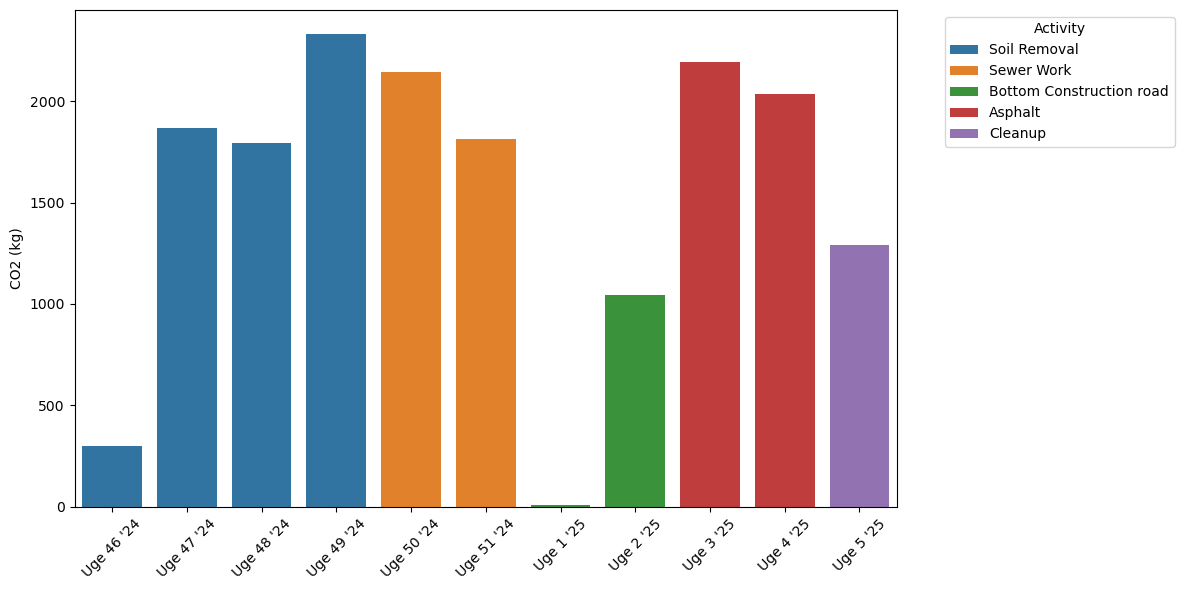

In [ ]:
df = pd.read_csv("DATA/weekly_co2_oct_jan_25.csv", delimiter=",")
df = df.dropna()
df['Week_Num'] = range(1, len(df) + 1)  # Add numeric week for plotting

# Create a color palette for activities
activity_colors = sns.color_palette("tab10", len(df['Activity'].unique()))
activity_color_map = dict(zip(df['Activity'].unique(), activity_colors))

# Visualization 1: Stacked Bar Chart for Weekly Fuel Usage by Activity
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Week_Num', y='CO2 (diesel)', hue='Activity', data=df, dodge=False, palette=activity_color_map
)
plt.xticks(df['Week_Num'] - 1, df['Uger'], rotation=45)
plt.title('')
plt.xlabel('')
plt.ylabel('CO2 (kg)')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("Charts/co2_oct_jan.png", )
plt.show()


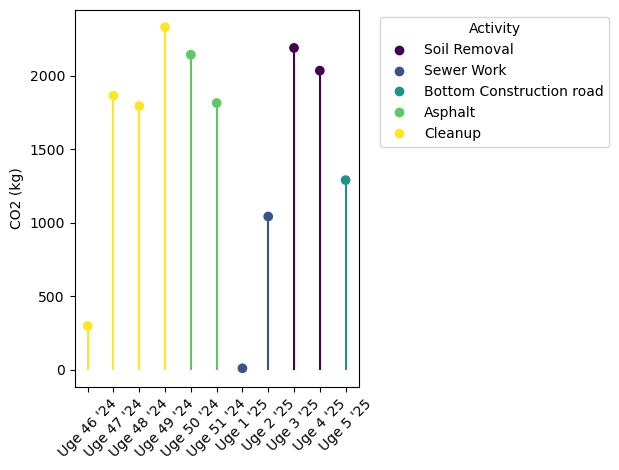

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['Uger'], df['CO2 (diesel)'], c=df['Activity'].astype('category').cat.codes)
ax.vlines(x=df['Uger'], ymin=0, ymax=df['CO2 (diesel)'], color=scatter.to_rgba(df['Activity'].astype('category').cat.codes))
handles, labels = scatter.legend_elements()
ax.legend(handles, df['Activity'].unique(), title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_ylabel("Fuel (l)")
ax.set_xlabel("Week")
plt.xticks(df['Week_Num'] - 1, df['Uger'], rotation=45)
plt.title('')
plt.xlabel('')
plt.ylabel('CO2 (kg)')
plt.tight_layout()
plt.savefig("Charts/co2_oct_jan.png", transparent= True)
plt.show()

In [11]:
#df_melted = df.melt(id_vars=['Uger',],value_vars=['Idling', 'Working'], var_name='Category',value_name='Hours')
#df_melted